In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("marketing_campaign.csv", sep=";")
df.head()



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [12]:
spend_cols = [
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds"
]

df["Total_Spend"] = df[spend_cols].sum(axis=1)
df["Total_Spend"].head()


0    1617
1      27
2     776
3      53
4     422
Name: Total_Spend, dtype: int64

In [ ]:
# Average Spending per Customer

In [13]:
average_spend = df["Total_Spend"].mean()
average_spend


np.float64(605.7982142857143)

In [ ]:
# Identify Top 10% Spenders

In [16]:
threshold = df["Total_Spend"].quantile(0.90)
top_spenders = df[df["Total_Spend"] >= threshold]

top_spenders.shape


(224, 30)

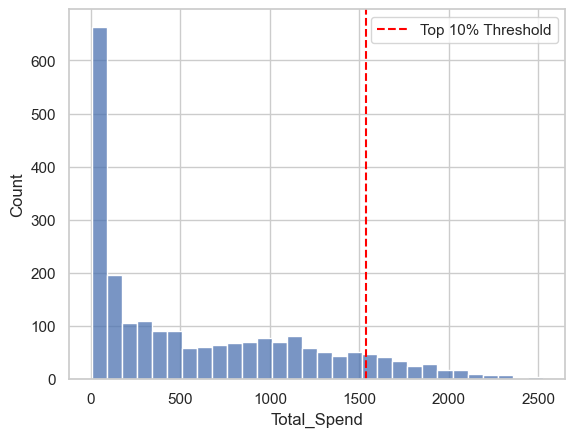

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Total_Spend"], bins=30)
plt.axvline(threshold, color="red", linestyle="--", label="Top 10% Threshold")
plt.legend()
plt.show()


In [ ]:
# Detect Skewness in Customer Engagement Metrics

In [19]:
engagement_cols = [
    "NumWebVisitsMonth",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases"
]
df[engagement_cols].skew()


NumWebVisitsMonth      0.207926
NumWebPurchases        1.382794
NumCatalogPurchases    1.880989
NumStorePurchases      0.702237
dtype: float64

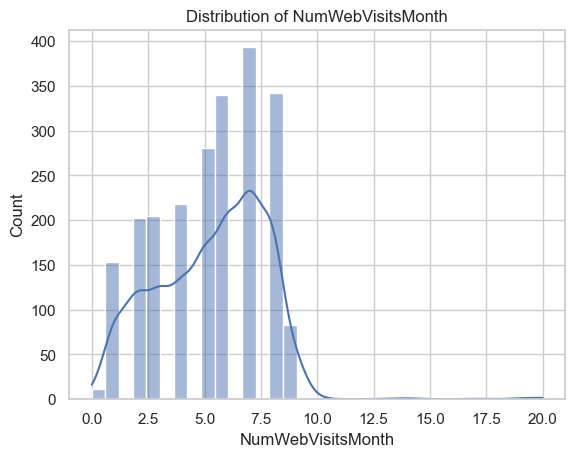

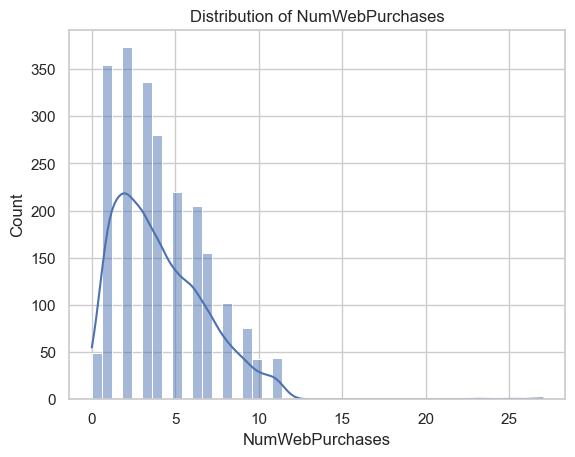

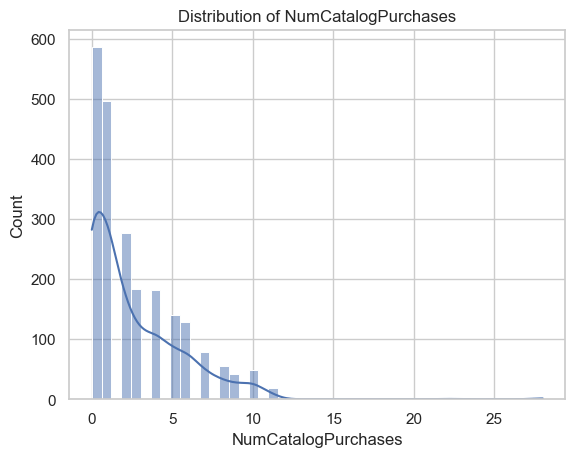

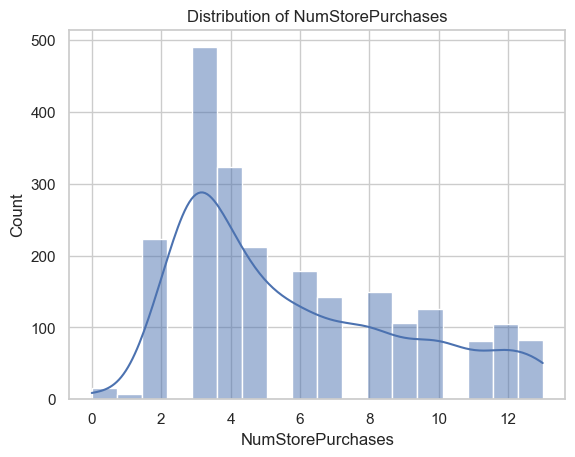

In [20]:
for col in engagement_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
